In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### importing dataset

In [4]:
data = pd.read_csv('/content/heart_disease_dataset.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [7]:
data.shape

(303, 14)

In [8]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

#### There are total 14 features/columns.

age: person age in years

sex: person sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: person's resting blood pressure (mm Hg on admission to the hospital)

chol: person cholesterol measurement in mg/dl

fbs: person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


##### Here all the columns have numerical data type except 'ca' and 'thal'.

In [10]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#####No null values present in the dataset.

In [12]:
data[['ca','thal']]

,ca,thal
0,0,6
1,3,3
2,2,7
3,0,3
4,0,3
...,...,...
298,0,7
299,2,7
300,1,7
301,1,3


#####Here we can observe there is an invalid data '?' present in 'ca' column.

In [13]:
data.iloc[266]

age          52
sex           1
cp            4
trestbps    128
chol        204
fbs           1
restecg       0
thalach     156
exang         1
oldpeak     1.0
slope         2
ca            0
thal          ?
num           2
Name: 266, dtype: object

#####column 'thal' has also some invalid data i.e. '?' .

In [14]:
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [15]:
data['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [16]:
mode_ca = data['ca'].mode()
mode_thal = data['thal'].mode()

In [17]:
mode_ca = int(mode_ca)
mode_thal = int(mode_thal)

In [18]:
data['ca'] = data['ca'].replace('?', mode_ca)
data['thal'] = data['thal'].replace('?', mode_thal)

#####replaced '?' by the mode of 'ca' and 'thal' columns respectively.

In [19]:
data[['ca','thal']] = data[['ca','thal']].astype(int)

In [20]:
data['ca'].unique()

array([0, 3, 2, 1])

In [21]:
data['thal'].unique()

array([6, 3, 7])

In [22]:
data.duplicated().sum()

0

##### There is no any duplicate value in the dataset.

In [23]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [24]:
data.groupby('num').size()

num
0    164
1     55
2     36
3     35
4     13
dtype: int64

In [25]:
#Converting Numerical Data into Categorical Data

def heart_disease(value):
    if value==0:
        return 'Absence'
    elif value >= 1:
        return 'Presence'

In [26]:
#Applying converted data into our dataset with new column - heart_disease

data['heart_disease']=data['num'].apply(heart_disease)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence


In [27]:
h_d = data.groupby('heart_disease').size()
h_d

heart_disease
Absence     164
Presence    139
dtype: int64

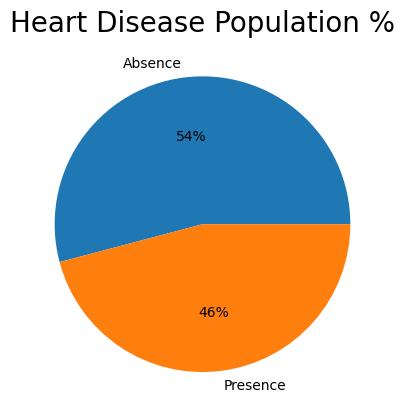

In [28]:
# pie chart to find % of heart disease population

plt.pie(h_d, labels=['Absence','Presence'],  autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

#### % of population having heart disease is lesser than population who doesn't have heart disease.

<ipython-input-29-44804e4c6582>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidth=3)


<Axes: >

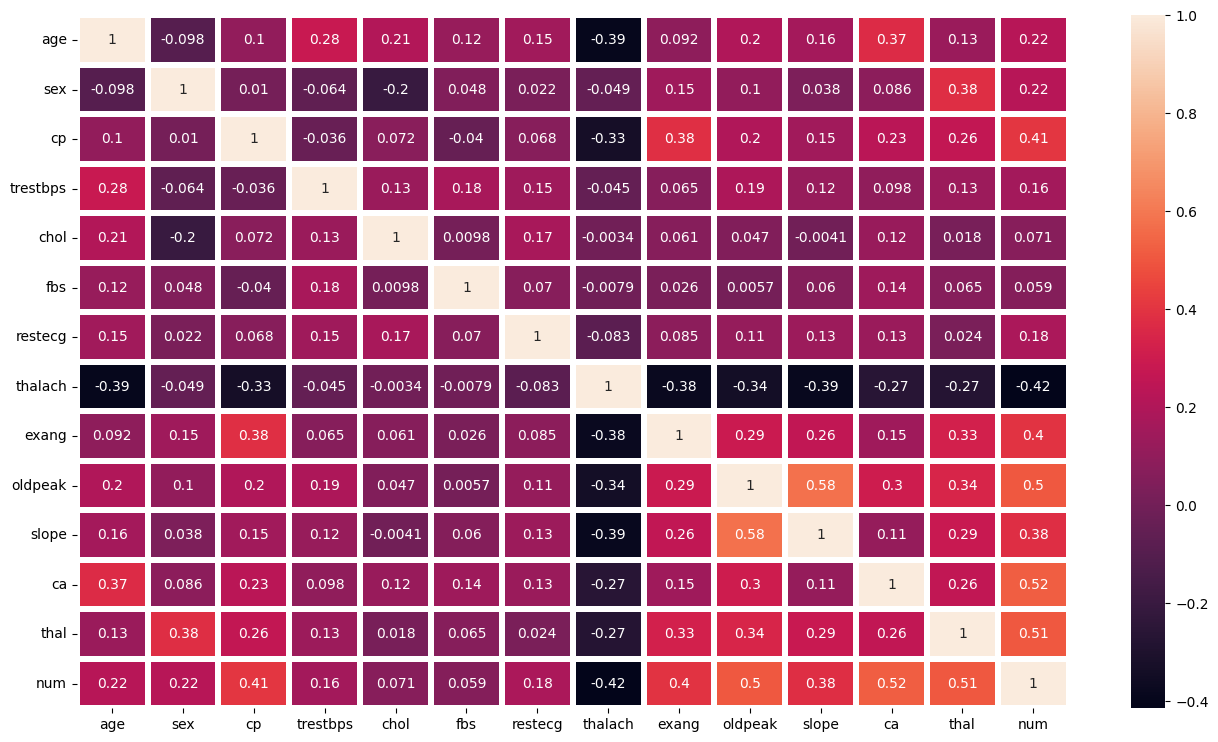

In [29]:
#Heatmap using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)

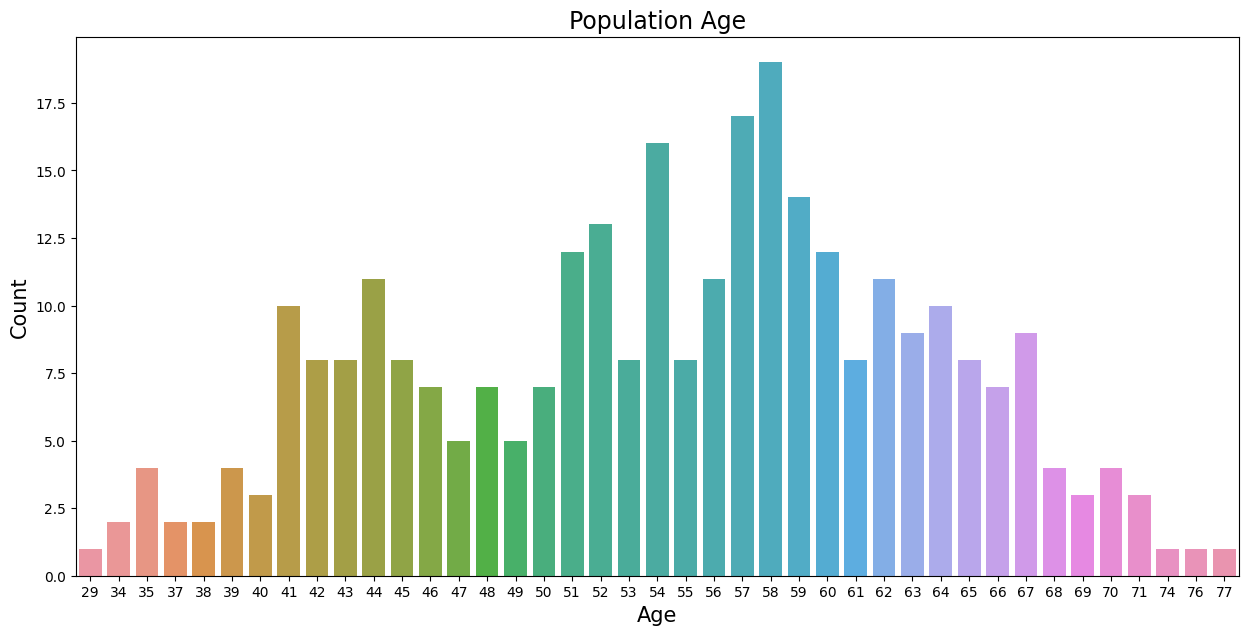

In [30]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

####Most number of person are from age 40-70.

In [31]:
#Statistical Analysis

min_age=data['age'].min()
max_age=data['age'].max()
mean_age=data['age'].mean()
print("Minimum Age =",min_age)
print("Maximum Age =",max_age)
print("Mean Age =",mean_age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [32]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


####In the above cell I have divided the age into three age groups.

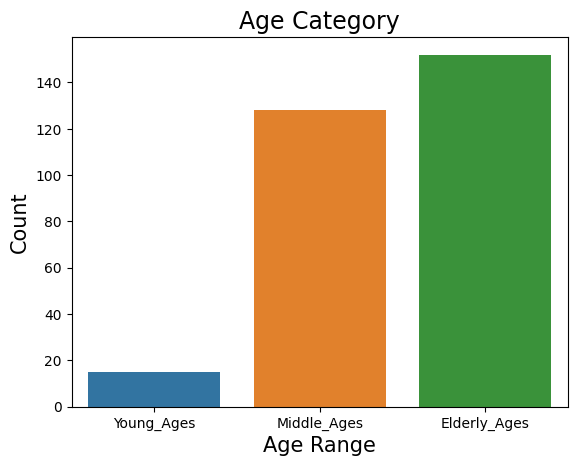

In [33]:
#Bar Plot of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)])
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

####Most no. of persons belogs to either middle age group or elderly age group.

In [34]:
def gender(value):
    if value==1:
        return 'Male'
    elif value==0:
        return 'Female'

In [35]:
#Applying above function into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


In [36]:
#Converting Numerical Data into Categorical Data

def age_range(val):
    if val>=29 and val<40:
        return 'Young Age'
    elif val>=40 and val<55:
        return 'Middle Age'
    elif val>55:
        return 'Elder Age'

In [37]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age


####Converted num, sex and age column into categorical variable.

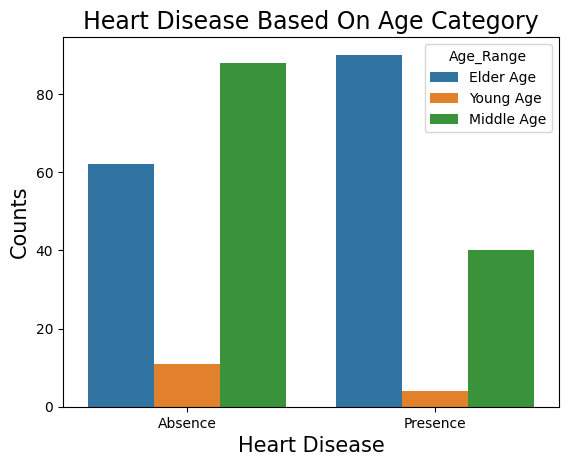

In [38]:
#Count Plot of Heart Disease Based On Age Category

sns.countplot(x='heart_disease', hue='Age_Range', data=data)
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()


#### Elder age people are mostly affected by heart disease.

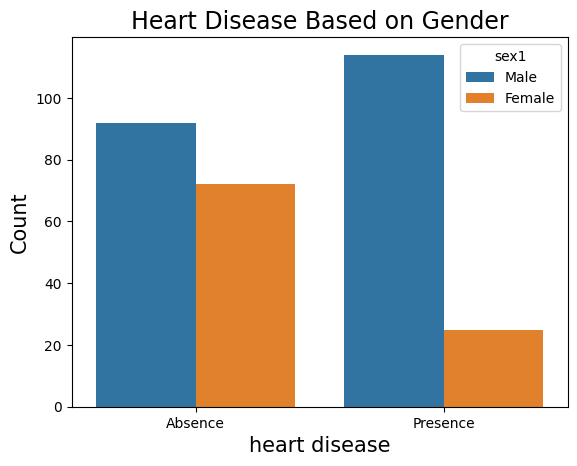

In [39]:
#Count Plot Creation of Heart Disease Based on Gender

sns.countplot(x=data['heart_disease'], hue='sex1', data=data)
plt.xlabel('heart disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

#### Male population are more affected by heart disease incomparison to female population.

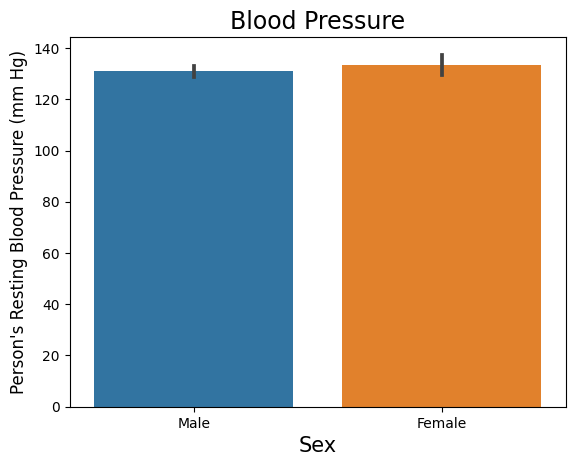

In [40]:
#Bar Plot of Person's Resting Blood Pressure in (mm Hg)

sns.barplot(x='sex1', y='trestbps', data=data)
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

####Blood pressure rate is almost similar in males and females.

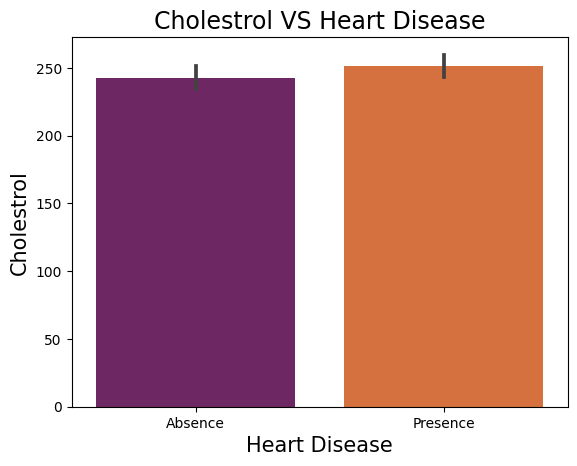

In [41]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='heart_disease', y='chol', data=data, palette='inferno')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

#### Higher cholestrol level results increase in chances of heart disease.

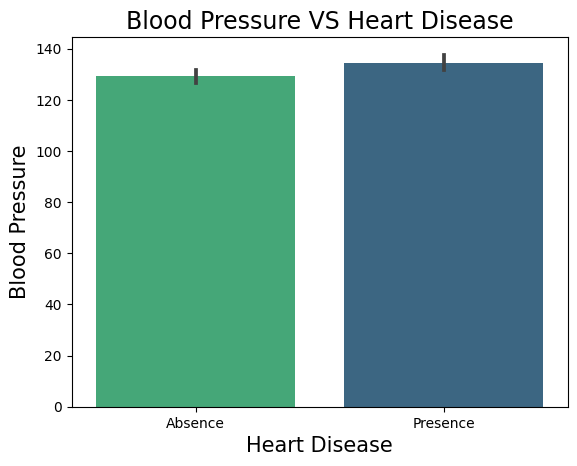

In [42]:
#Bar Plot of Blood Pressure VS Heart Disease

sns.barplot(x='heart_disease', y='trestbps', data=data, palette='viridis_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

####Higher blood pressure level results increase in chances of heart disease.

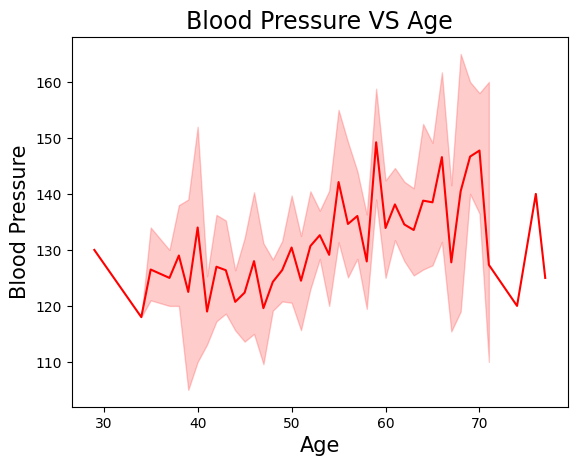

In [43]:
#Line Plot of Blood Pressure VS Age

sns.lineplot(x='age', y='trestbps', data=data, color='red')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

we can observe that blood pressure started to increase from the age of 50 and continues the same pattern till the age of 70.

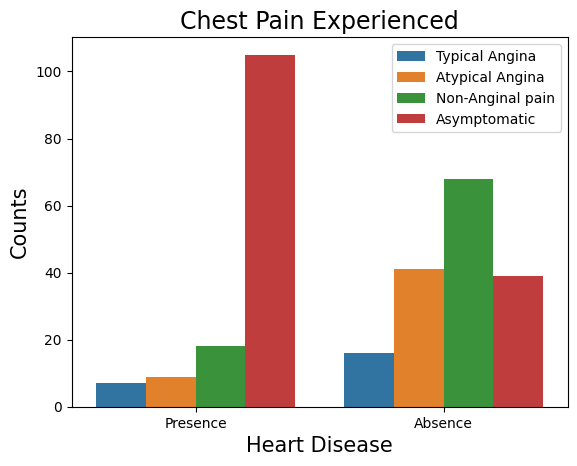

In [44]:
#Count Plot of Chest Pain Experienced

sns.countplot(x=data['heart_disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

Here we can observe that person having asymptomatic chest pain have a higher chance of heart disease.

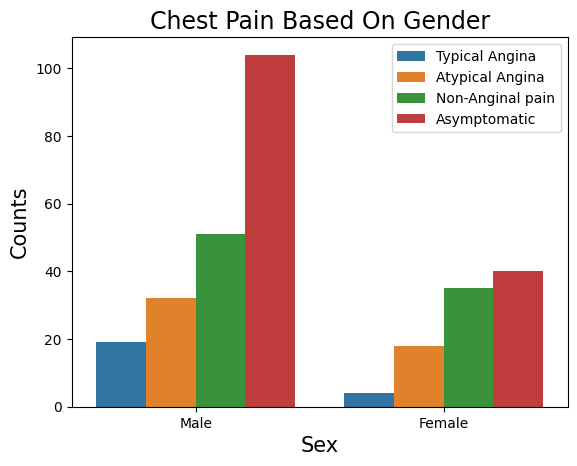

In [45]:
sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

we can see that higher number number of male population suffered from asymptomatic chest pain.

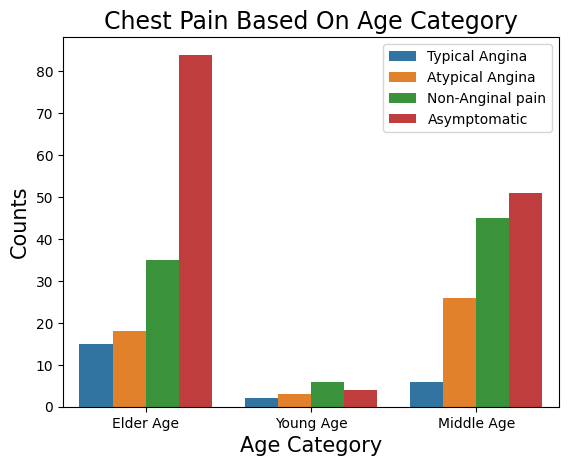

In [46]:
#Count Plot of Chest Pain Based On Age Category

sns.countplot(x=data['Age_Range'], hue='cp', data=data)
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

 There is very high number of Asymptomatic Pain in Elderly age Category.

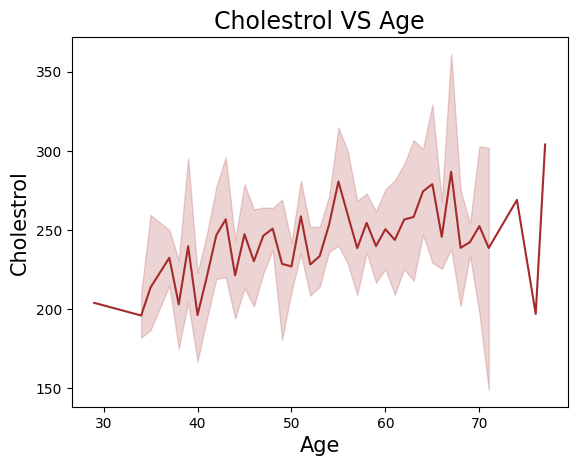

In [47]:
#Line Plot Cholestrol VS Age

sns.lineplot(x='age', y='chol', data=data, color='brown')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

we can observe that cholestrol level started to increase from the age of 40-70.

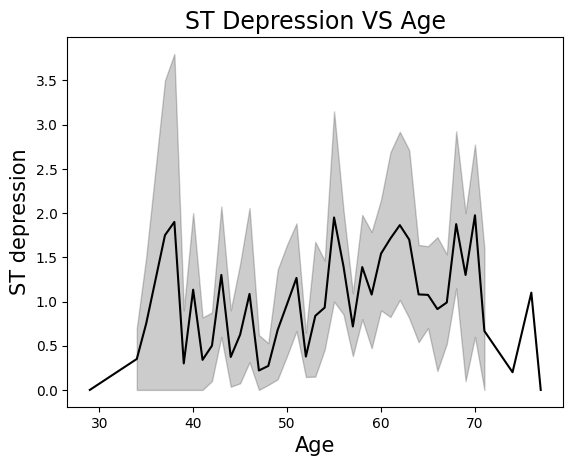

In [48]:
#Line Plot of ST Depression VS Age

sns.lineplot(x='age', y='oldpeak', data=data, color='black')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

ST depression mostly increases in the age of 30-40.

ST depression refers to a finding on hearts electrical activity, wherein the trace in the ST segment is abnormally low below the baseline.

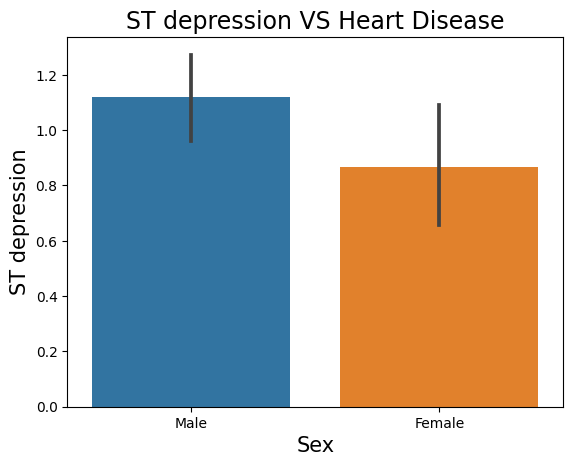

In [49]:
#Bar Plot of ST depression VS Heart Disease

sns.barplot(x='sex1', y='oldpeak', data=data)
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

Males are more prone to st depression than females.

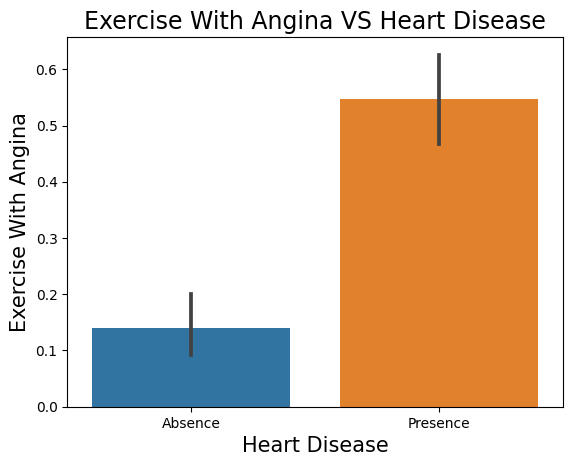

In [50]:
#Bar Plot of Exercise With Angina VS Heart Disease

sns.barplot(x='heart_disease', y='exang', data=data)
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

if you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

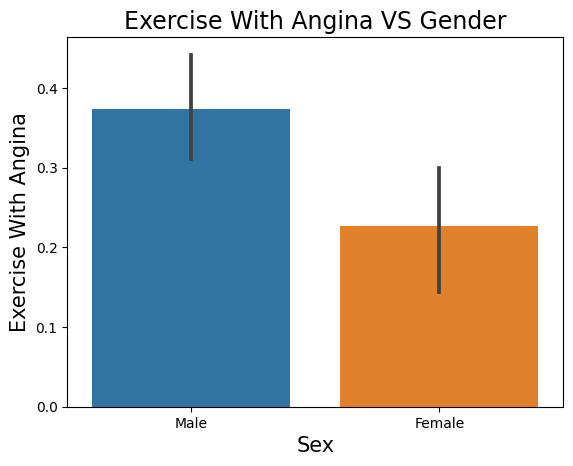

In [54]:
#Bar Plot of Exercise With Angina VS Gender

sns.barplot(x='sex1', y='exang', data=data)
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

Males have high Exercise Angina.

A type of chest pain caused by reduced blood flow to the heart.

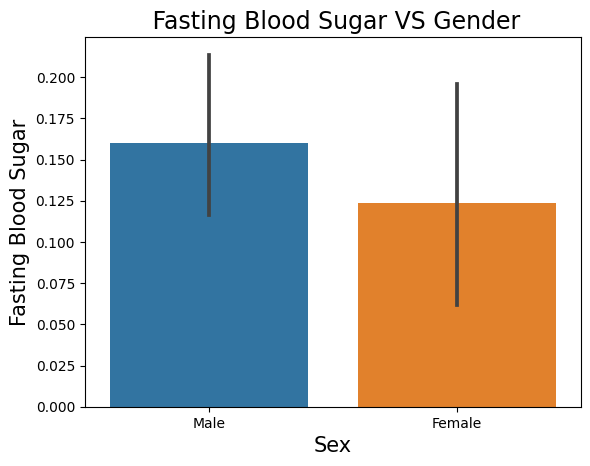

In [53]:
#Bar Plot of Fasting Blood Sugar VS Gender

sns.barplot(y='fbs', x='sex1', data=data)
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

#### fasting blood sugar is more in males.

***Your fasting blood sugar level is the amount of sugar in your blood after you have gone without food for at least 8 hours. The normal fasting blood sugar level is less than 100 mg/dL. If your fasting blood sugar level is between 100 and 125 mg/dL, you have a condition called prediabetes. This means you are at high risk for developing diabetes. If your fasting blood sugar level is greater than 125 mg/dL, you have diabetes.